In [5]:
import numpy as np
import os
import math
from math import cos, sin
from pathlib import Path
import pandas as pd
from PIL import Image, ImageFilter
import glob
from scipy.io import loadmat
import cv2

In [3]:
!wget http://www.cbsr.ia.ac.cn/users/xiangyuzhu/projects/3DDFA/Database/AFLW2000-3D.zip \ -O file.zip

--2022-06-17 14:45:51--  http://www.cbsr.ia.ac.cn/users/xiangyuzhu/projects/3DDFA/Database/AFLW2000-3D.zip
Resolving www.cbsr.ia.ac.cn (www.cbsr.ia.ac.cn)... 159.226.21.60
Connecting to www.cbsr.ia.ac.cn (www.cbsr.ia.ac.cn)|159.226.21.60|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87413900 (83M) [application/x-zip-compressed]
Saving to: ‘AFLW2000-3D.zip’

AFLW2000-3D.zip     100%[===================>]  83.36M   278KB/s    in 5m 14s  

2022-06-17 14:51:06 (272 KB/s) - ‘AFLW2000-3D.zip’ saved [87413900/87413900]

--2022-06-17 14:51:06--  http://%20-o/
Resolving  -o ( -o)... failed: Name or service not known.
wget: unable to resolve host address ‘ -o’
--2022-06-17 14:51:06--  http://file.zip/
Resolving file.zip (file.zip)... failed: Name or service not known.
wget: unable to resolve host address ‘file.zip’
FINISHED --2022-06-17 14:51:06--
Total wall clock time: 5m 15s
Downloaded: 1 files, 83M in 5m 14s (272 KB/s)


In [ ]:
# Loading AFLW2000 Data
!unzip /content/AFLW2000-3D.zip

In [ ]:
mat = loadmat(r'/content/AFLW2000/image00004.mat')
print(mat)

In [8]:
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'pt2d', 'Illum_Para', 'Color_Para', 'Tex_Para', 'Shape_Para', 'Exp_Para', 'Pose_Para', 'roi', 'pt3d_68'])

In [9]:
mat['pt3d_68'].shape

(3, 68)

In [10]:
mat['Pose_Para']

array([[ 4.7006503e-01,  1.1895334e+00,  3.0095881e-01,  3.3081970e+02,
         1.7319424e+02, -4.4367504e+01,  1.1811422e-03]], dtype=float32)

In [ ]:
mat['pt3d_68']

In [33]:
def getx_y (file_path):
    mat = loadmat(file_path)
    points=mat['pt3d_68'][0:2]
    
    '''
    x = mat['pt3d_68'][:1]
    y =mat['pt3d_68'][1:2]
    z =mat['pt3d_68'][2:3]
    '''
    return points

In [34]:
getx_y(r'/content/AFLW2000/image00004.mat')


array([[281.23816, 277.33942, 274.87695, 269.52377, 257.78827, 240.96815,
        221.80148, 205.8463 , 207.08545, 226.18564, 254.81445, 282.76337,
        306.93597, 322.68658, 331.1619 , 336.49744, 341.28934, 221.99915,
        211.36966, 208.55469, 208.92897, 210.88596, 227.24799, 234.27948,
        244.74814, 257.117  , 271.07208, 213.09018, 202.01886, 190.40382,
        186.15196, 203.62306, 200.27055, 200.16187, 205.58698, 212.63629,
        219.60034, 213.51141, 216.28003, 222.67075, 217.18683, 215.85431,
        239.99811, 241.14363, 246.22702, 256.14462, 246.85129, 240.27838,
        206.68646, 198.77388, 195.23763, 196.5263 , 199.83258, 211.0683 ,
        226.80066, 210.58345, 201.24966, 196.73563, 195.09518, 198.44182,
        206.93408, 199.80356, 200.1837 , 204.9532 , 225.6643 , 203.54272,
        199.18753, 197.53447],
       [265.07935, 287.04456, 307.05414, 324.187  , 340.334  , 349.407  ,
        350.9306 , 347.8684 , 345.31607, 339.48825, 337.19672, 332.8853 ,
       

In [35]:
def getposlabel (file_path):
    mat = loadmat(file_path)
    pose = mat['Pose_Para'][0][:3]
    
    '''
    x_label = pose[:1]
    y_label =pose[1:2]
    z_label =pose[2:3]
    '''
    return pose

In [36]:
getposlabel(r'/content/AFLW2000/image00004.mat')

array([0.47006503, 1.1895334 , 0.3009588 ], dtype=float32)

In [37]:
from os import listdir

def list_0f_pathes(file_path):
    mylist= [f for f in os.listdir(file_path) if f.endswith('.mat')]
    return mylist

In [39]:
def get_features_labels(file_path):
    labels=[]
    features=[]
    mylist=list_0f_pathes(file_path)
    
    for f in mylist:
        path = file_path+f

        labels.append(getposlabel(path))
        features.append(getx_y(path))
    return labels , features

In [40]:
labels, featues =get_features_labels(r'/content/AFLW2000/')


In [41]:
def img_name(file_path):
    img= [f for f in os.listdir(file_path) if f.endswith('.mat')]
    img=[i.replace('.mat','') for i in img]

    return img

In [42]:
index=img_name(r'/content/AFLW2000')

In [43]:
x_column = ['x' + str(i) for i in range(0,68)]
y_column = ['y' + str(i) for i in range(0,68)]
#z_column = ['z' + str(i) for i in range(0,68)]

x =  [i[0] for i in featues]
y =  [i[1] for i in featues]
#z =  [i[2] for i in featues]

dfx = pd.DataFrame(x, columns = x_column)
dfy = pd.DataFrame(y, columns = y_column)
#dfz = pd.DataFrame(z, columns = z_column)

df_labels = pd.DataFrame (labels , columns = ['pitch', 'yaw', 'roll'])

In [44]:
df_features = pd.concat([dfx,dfy], axis=1)
df=pd.concat([dfx,dfy,df_labels], axis=1)

In [45]:
df_features['index'] = index
df_labels['index'] = index
df_features = df_features.set_index('index')
df_labels = df_labels.set_index('index')

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_features, df_labels, test_size=0.2)

In [47]:
df_features

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,y58,y59,y60,y61,y62,y63,y64,y65,y66,y67
index,,,,,,,,,,,,,,,,,,,,,
image00392,118.079071,122.504181,125.383766,131.188416,146.092346,169.909409,198.594910,225.257965,230.216675,209.427856,...,309.782501,309.857483,311.646240,308.176758,309.030548,310.360229,313.022156,302.758728,301.742981,301.333221
image00032,147.385315,143.063782,137.998077,137.558670,144.704132,160.506271,180.784744,196.830383,200.384430,187.811630,...,339.452454,333.172241,325.615601,325.684540,324.110352,324.208252,324.898712,327.016724,328.294220,327.821472
image00713,151.435928,152.768555,159.093079,162.986267,166.111145,172.283371,178.266968,192.071304,216.814880,244.857391,...,320.853027,313.842529,299.601807,275.869324,273.654541,276.197113,303.795471,313.638123,314.514465,312.809143
image04161,287.339905,293.237000,299.991058,303.875641,302.763855,293.917572,280.079224,265.784851,261.302094,269.675171,...,309.087646,298.956726,286.858032,292.606049,297.002411,300.855957,311.535126,304.652740,300.632568,294.974121
image02635,105.226700,107.043846,111.611664,116.958908,126.286842,143.974548,166.572372,192.635956,218.971237,234.956451,...,318.909607,310.197632,295.848633,297.845276,298.352173,296.357239,294.022675,307.780334,310.579132,308.797485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
image03703,76.409111,93.178192,112.765045,131.377533,155.166046,184.105881,211.112854,242.685120,282.474915,313.088348,...,336.936371,338.311707,331.230164,312.514954,307.669739,302.908569,301.528900,314.465149,320.656250,324.954010
image03762,221.754700,220.525146,222.120316,222.511536,220.486450,217.571381,212.242050,211.050446,224.505585,249.205811,...,320.121155,313.412537,305.168701,306.480408,308.022278,310.008423,314.491943,313.998199,312.622131,310.211853
image04019,215.944183,217.485840,222.244141,224.804169,224.483307,221.582748,216.068008,215.282974,227.881607,251.183899,...,287.338196,290.638733,291.829376,275.993225,271.773468,268.936157,271.595642,274.138672,277.629211,281.308441


In [48]:
y_train_pitch= y_train['pitch']
y_train_yaw= y_train['yaw']
y_train_roll= y_train['roll']

y_test_pitch= y_test['pitch']
y_test_yaw=y_test['yaw']
y_test_roll= y_test['roll']

In [49]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

params = { 'max_depth': [6,8],
           'learning_rate': [0.01, 0.05],
           'n_estimators': [100, 500]}
xgbr = xgb.XGBRegressor(seed = 20)
clf = GridSearchCV(estimator=xgbr, 
                   param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=1)
clf.fit(X_train.values,y_train_pitch)
print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[16:03:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:04:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:04:14] WARNING: /workspace/src/objective/regres

KeyboardInterrupt: ignored

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

params = { 'max_depth': [6,8],
           'learning_rate': [0.01, 0.05],
           'n_estimators': [100, 500]}
xgbr = xgb.XGBRegressor(seed = 20)
clf = GridSearchCV(estimator=xgbr, 
                   param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=1)
clf.fit(X_train.values,y_train_yaw)
print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

params = { 'max_depth': [6,8],
           'learning_rate': [0.01, 0.05],
           'n_estimators': [100, 500]}
xgbr = xgb.XGBRegressor(seed = 20)
clf = GridSearchCV(estimator=xgbr, 
                   param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=1)
clf.fit(X_train.values,y_train_roll)
print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

In [50]:
from xgboost import XGBRegressor

model1 = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, subsample=0.8, colsample_bytree=0.8, nthread=6 )
model2 = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, subsample=0.8, colsample_bytree=0.8, nthread=6)
model3 = XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=6, subsample=0.8, colsample_bytree=0.8, nthread=6 )

In [51]:
model1.fit(X_train.values,y_train_pitch)
model2.fit(X_train.values,y_train_yaw)
model3.fit(X_train.values,y_train_roll)

[16:05:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:05:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:05:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(colsample_bytree=0.8, learning_rate=0.05, max_depth=6,
             n_estimators=500, nthread=6, subsample=0.8)

In [53]:
#Saving models
#https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
import joblib
# save the model to disk
filename1 = 'finalized_model1.sav'
joblib.dump(model1, filename1)
filename2 = 'finalized_model2.sav'
joblib.dump(model2, filename2)
filename3 = 'finalized_model3.sav'
joblib.dump(model3, filename3)

['finalized_model3.sav']

In [52]:
pitch_predict =model1.predict(X_test.values)
yaw_predict =model2.predict(X_test.values)
roll_predict =model3.predict(X_test.values)


In [54]:
pitch_predict= pd.DataFrame(data = pitch_predict, index=X_test.index)
yaw_predict = pd.DataFrame(data = yaw_predict, index=X_test.index)
roll_predict = pd.DataFrame(data = roll_predict, index=X_test.index)


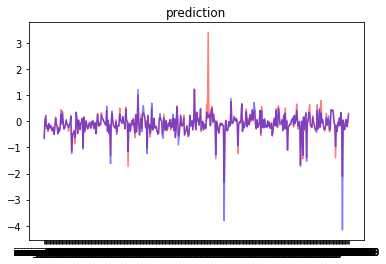

<Figure size 10800x7200 with 0 Axes>

In [55]:

import matplotlib.pyplot as plt 
%matplotlib inline

plt.plot(y_test_pitch, color = 'red',alpha=0.5)
plt.plot(pitch_predict, color = 'blue', alpha=0.5)
plt.title('prediction')
plt.figure(figsize=(150,100))
plt.show()

In [56]:
from sklearn.metrics import r2_score
print(r2_score(y_test_pitch, pitch_predict))
print(r2_score(y_test_roll, roll_predict))
print(r2_score(y_test_yaw, yaw_predict))



0.7131622667897228
0.11157296284503382
0.9961369986944341


In [57]:
y_test_pitch


index
image00545   -0.643371
image02085    0.059427
image02028    0.162710
image02612   -0.176080
image02128   -0.151672
                ...   
image00788   -0.033565
image03787    0.059445
image03050   -0.201965
image00893   -0.066223
image00889    0.246211
Name: pitch, Length: 400, dtype: float64

## Drawing arrows

In [58]:
def draw_axis(img, yaw, pitch, roll, tdx=None, tdy=None, size = 100):

    if tdx != None and tdy != None:
        tdx = tdx
        tdy = tdy
    else:
        height, width = img.shape[:2]
        tdx = width / 2
        tdy = height / 2

    # X-Axis pointing to right. drawn in red
    x1 = size * (cos(yaw) * cos(roll)) + tdx
    y1 = size * (cos(pitch) * sin(roll) + cos(roll) * sin(pitch) * sin(yaw)) + tdy

    # Y-Axis | drawn in green
    #        v
    x2 = size * (-cos(yaw) * sin(roll)) + tdx
    y2 = size * (cos(pitch) * cos(roll) - sin(pitch) * sin(yaw) * sin(roll)) + tdy

    # Z-Axis (out of the screen) drawn in blue
    x3 = size * (sin(yaw)) + tdx
    y3 = size * (-cos(yaw) * sin(pitch)) + tdy

    cv2.line(img, (int(tdx), int(tdy)), (int(x1),int(y1)),(0,0,255),3)
    cv2.line(img, (int(tdx), int(tdy)), (int(x2),int(y2)),(0,255,0),3)
    cv2.line(img, (int(tdx), int(tdy)), (int(x3),int(y3)),(255,0,0),2)

    return img

In [59]:
def return_img_byname(img_name):
  file_path = '/content/AFLW2000/'
  image_path = file_path+ img_name+ '.jpg'
    
  capture = cv2.VideoCapture(image_path)
  ret, frame = capture.read()
  landmarks= df_features.loc[img_name]
  nose_x, nose_y = landmarks['x32'], landmarks['y32']
  pitch =pitch_predict.loc[img_name]
  yaw =yaw_predict.loc[img_name]
  roll= roll_predict.loc[img_name]
  capture.release()
  cv2.destroyAllWindows()

  return frame,pitch,yaw,roll, nose_x, nose_y

In [60]:
def show_image(img,pitch,yaw,roll,nose_x, nose_y):
    #file_path = '/content/AFLW2000/'
    #image_path = file_path+ img_name+ '.jpg'
    
    #capture = cv2.VideoCapture(image_path)
    #ret, frame = capture.read()
    frame = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # convert to RGB format for matplotlib
    """
    landmarks= df_features.loc[img_name]
    pitch =df_labels.loc[img_name]['pitch']
    yaw= df_labels.loc[img_name]['yaw']
    roll= df_labels.loc[img_name]['roll']
    """
    """
    landmarks= df_features.loc[img_name]
    pitch =pitch_predict.loc[img_name]
    yaw =yaw_predict.loc[img_name]
    roll= roll_predict.loc[img_name]
    """
    plt.imshow(draw_axis(frame, yaw, pitch, roll, nose_x, nose_y))
    plt.show()


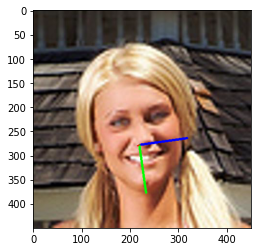

In [64]:
frame, pitch, yaw ,roll, nose_x, nose_y = return_img_byname('image00788')
show_image(frame,pitch,yaw,roll, nose_x, nose_y)


In [62]:
pip install opencv-python


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [65]:
pitch_predict

,0
index,
image00545,-0.661230
image02085,0.008286
image02028,0.240474
image02612,-0.271335
image02128,-0.155821
...,...
image00788,-0.016951
image03787,0.082286
image03050,-0.209555


# detecting  face landmarks 

In [66]:
pip install imutils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [67]:
pip install cmake


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install dlib

In [68]:
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!bunzip2 /content/shape_predictor_68_face_landmarks.dat.bz2

--2022-06-17 16:07:08--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  63.4MB/s    in 1.0s    

2022-06-17 16:07:09 (63.4 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]

bunzip2: Output file /content/shape_predictor_68_face_landmarks.dat already exists.


In [69]:
%pylab inline
from IPython.display import clear_output
from imutils import face_utils
import dlib
import cv2

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['roll', 'sin', 'clf', 'cos', 'mat']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [70]:
def detect_landmarks(img):
  # get landmarks from dlib
  p = "/content/shape_predictor_68_face_landmarks.dat"
  detector = dlib.get_frontal_face_detector()
  predictor = dlib.shape_predictor(p)
  frame_count = 0
  #path = '/content/AFLW2000/image00014.jpg'
  #img = dlib.load_rgb_image(path)
  dets = detector(img, 1)
  landmarks = np.zeros((2, 68), dtype=int)

  print("Number of faces detected: {}".format(len(dets)))
  for k, d in enumerate(dets):
      # Get the landmarks/parts for the face in box d.
      shape = predictor(img, d)
      
      shape = face_utils.shape_to_np(shape)
      #print(shape.shape)
      shape=shape.T
      x=shape[0].reshape(1, -1)
      y=shape[1].reshape(1, -1)
      xd = pd.DataFrame(x, columns = x_column)
      yd = pd.DataFrame(y, columns = y_column)
      landmarks = pd.concat([xd,yd], axis=1)

      #print(x.shape)

      return landmarks

In [71]:
path = '/content/AFLW2000/image00014.jpg'
img = dlib.load_rgb_image(path)


marks = detect_landmarks(img)

marks


Number of faces detected: 1


,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,y58,y59,y60,y61,y62,y63,y64,y65,y66,y67
0,125,127,132,138,146,160,179,203,234,265,...,349,349,347,338,338,338,344,337,337,337


In [ ]:
print(marks.shape)

In [79]:
def video_axis(path):
  from google.colab.patches import cv2_imshow
  cap = cv2.VideoCapture(path)
  i=0
  image_files=[]
  while(cap.isOpened()):
      ret, frame = cap.read()
      #cv2_imshow( frame)
      landmark = detect_landmarks(frame)
      #print(landmark)
      #cv2.imwrite('kang'+str(i)+'.jpg',frame)
      i+=1
      
      if landmark is not None:
        nose_x= landmark['x32'].iloc[0]
        nose_y= landmark['y32'].iloc[0]
        pitch = model1.predict(landmark.values)
        yaw = model2.predict(landmark.values)
        roll = model3.predict(landmark.values)
        frame1 = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB) # convert to RGB format for matplotlib
        pic=draw_axis(frame1, yaw, pitch, roll, nose_x,nose_y)
        plt.imshow(pic)
        plt.show()
        plt.imsave('/content/images/'+str(i)+'.jpg', pic)
        image_files.append('/content/images/'+str(i)+'.jpg')
        print(image_files)
      if cv2.waitKey(1) & 0xFF == ord('q'):
          break

  cap.release()
  cv2.destroyAllWindows()
  return image_files

In [ ]:
image_files= video_axis('/content/stock-footage-nervous-young-handsome-man-waiting-for-somebody-sighing-over-white-background.mp4')

In [85]:
image_files

['/content/images/5.jpg',
 '/content/images/7.jpg',
 '/content/images/8.jpg',
 '/content/images/9.jpg',
 '/content/images/10.jpg',
 '/content/images/11.jpg',
 '/content/images/12.jpg',
 '/content/images/13.jpg',
 '/content/images/14.jpg',
 '/content/images/15.jpg',
 '/content/images/16.jpg',
 '/content/images/17.jpg',
 '/content/images/18.jpg',
 '/content/images/19.jpg',
 '/content/images/20.jpg',
 '/content/images/21.jpg',
 '/content/images/22.jpg',
 '/content/images/23.jpg',
 '/content/images/24.jpg',
 '/content/images/25.jpg',
 '/content/images/26.jpg',
 '/content/images/27.jpg',
 '/content/images/28.jpg',
 '/content/images/29.jpg',
 '/content/images/30.jpg',
 '/content/images/31.jpg',
 '/content/images/32.jpg',
 '/content/images/33.jpg',
 '/content/images/34.jpg',
 '/content/images/35.jpg',
 '/content/images/36.jpg',
 '/content/images/37.jpg',
 '/content/images/38.jpg',
 '/content/images/39.jpg',
 '/content/images/40.jpg',
 '/content/images/41.jpg',
 '/content/images/42.jpg',
 '/co

In [84]:
from sklearn.utils.validation import indexable
##https://stackoverflow.com/questions/44947505/how-to-make-a-movie-out-of-images-in-python
#https://stackoverflow.com/questions/70115576/trying-to-convert-frames-into-videos-from-multiple-folder-with-subfolders

import os
import moviepy.video.io.ImageSequenceClip
fps=25

clip = moviepy.video.io.ImageSequenceClip.ImageSequenceClip(image_files, fps=fps)
clip.write_videofile('my_video.mp4')

[MoviePy] >>>> Building video my_video.mp4
[MoviePy] Writing video my_video.mp4


100%|██████████| 108/108 [00:02<00:00, 44.29it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: my_video.mp4 

